In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:

url="https://raw.githubusercontent.com/softwareWCU/Data-Preprocessing-for-ML-using-Titanic-Dataset/main/titanic2.csv"
df=pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  909 non-null    int64  
 1   Survived     909 non-null    int64  
 2   Pclass       909 non-null    object 
 3   Name         909 non-null    object 
 4   Sex          909 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        909 non-null    int64  
 7   Parch        909 non-null    int64  
 8   Ticket       909 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        208 non-null    object 
 11  Embarked     907 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 85.3+ KB


imports

In [9]:
 # shows dtypes and non-null counts
 print("shape:", df.shape)
display(df.head(8))
display(df.info())

shape: (909, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",MALE,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  909 non-null    int64  
 1   Survived     909 non-null    int64  
 2   Pclass       909 non-null    object 
 3   Name         909 non-null    object 
 4   Sex          909 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        909 non-null    int64  
 7   Parch        909 non-null    int64  
 8   Ticket       909 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        208 non-null    object 
 11  Embarked     907 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 85.3+ KB


None

Explore missing values & basic stats

In [10]:
# how many missing per column
missing_count = df.isnull().sum()
missing_pct   = (df.isnull().mean() * 100).round(2)
pd.DataFrame({"missing_count": missing_count, "missing_pct": missing_pct}).sort_values("missing_pct", ascending=False)


,missing_count,missing_pct
Cabin,701,77.12
Age,199,21.89
Fare,18,1.98
Embarked,2,0.22
Name,0,0.00
Pclass,0,0.00
Survived,0,0.00
PassengerId,0,0.00
Parch,0,0.00
SibSp,0,0.00


Convert columns to the proper types

In [11]:
# Convert 'Age' and 'Fare' columns to numbers (if not already numbers)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['Pclass'] = pd.to_numeric(df['Pclass'], errors='coerce')

# Check the data types after conversion
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Handle missing values

In [12]:
# Check how many missing values in each column
print(df.isnull().sum())
print("----------------------------")
# Example: Drop rows where 'Pclass' is missing (important column)
df = df.dropna(subset=['Pclass'])
print("----------------------------")

# Fill missing Age with median
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
print("----------------------------")
# Fill missing Fare with median
median_fare = df['Fare'].median()
df['Fare'].fillna(median_fare, inplace=True)
print("----------------------------")
# Fill missing Embarked with the most common value (mode)
most_common_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_embarked, inplace=True)
print("----------------------------")
# Check again to make sure missing values are handled
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass          18
Name             0
Sex              0
Age            199
SibSp            0
Parch            0
Ticket           0
Fare            18
Cabin          701
Embarked         2
dtype: int64
----------------------------
----------------------------
----------------------------
----------------------------
----------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         0
dtype: int64


/tmp/ipython-input-3049503419.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
/tmp/ipython-input-3049503419.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Fix inconsistent categorical values

In [13]:
# Make 'Sex' values consistent (lowercase)
df['Sex'] = df['Sex'].astype(str).str.lower().str.strip()

# Make 'Embarked' values consistent (uppercase)
df['Embarked'] = df['Embarked'].astype(str).str.upper().str.strip()

# Check the unique values to confirm
print("Unique values in Sex:", df['Sex'].unique())
print("Unique values in Embarked:", df['Embarked'].unique())



Unique values in Sex: ['male' 'female']
Unique values in Embarked: ['S' 'C' 'Q' 'CHERBOURG' 'SOUTHAMPTON']


Remove duplicate rows

In [14]:
# Check how many duplicate rows exist
print("Number of duplicate rows:", df.duplicated().sum())

# Drop duplicate rows
df = df.drop_duplicates()

# Check again
print("After removing duplicates:", df.duplicated().sum())


Number of duplicate rows: 12
After removing duplicates: 0


Detect & handle outliers IQR method

In [15]:
#  Handling outliers
# For Age column
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Keep only rows inside the range
df = df[(df['Age'] >= lower_bound_age) & (df['Age'] <= upper_bound_age)]

# For Fare column
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

df = df[(df['Fare'] >= lower_bound_fare) & (df['Fare'] <= upper_bound_fare)]

print("Outliers handled")


Outliers handled


In [16]:
#  Handling duplicates

print("Number of duplicate rows before:", df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()

print("Number of duplicate rows after:", df.duplicated().sum())


Number of duplicate rows before: 0
Number of duplicate rows after: 0


In [17]:
#  Correcting inconsistencies
# -----------------------------------
# Convert Sex column to lowercase
df['Sex'] = df['Sex'].str.lower()

# Strip spaces and uppercase the first letter in Embarked column
df['Embarked'] = df['Embarked'].str.strip().str.upper()

print(" Inconsistencies corrected")


 Inconsistencies corrected


Final check & save cleaned file

In [18]:
# Final check for missing values
print("Missing values after cleaning:")
print(df.isnull().sum())

# Check final shape
print("Final shape of data:", df.shape)

# Save cleaned dataset to a new CSV file
df.to_csv("titanic_cleaned_basic.csv", index=False)

# If you want to download the file in Colab:
from google.colab import files
files.download("titanic_cleaned_basic.csv")


print("Data types:\n", df.dtypes)
print("\nFirst 5 rows:")
print(df.head())

Missing values after cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          612
Embarked         0
dtype: int64
Final shape of data: (711, 12)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data types:
 PassengerId      int64
Survived         int64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0     3.0   
2            3         1     3.0   
3            4         1     1.0   
4            5         0     3.0   
5            6         0     3.0   

                                           Name     Sex   Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    male  22.0      1      0   
2                        Heikkinen, Miss. Laina  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   
5                              Moran, Mr. James    male  28.0      0  

 Number of Survivors vs Non-Survivors

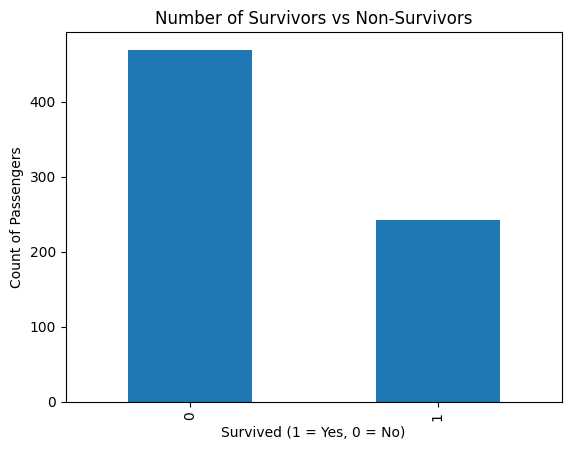

In [19]:
df['Survived'].value_counts().plot(kind='bar')
plt.title('Number of Survivors vs Non-Survivors')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Count of Passengers')
plt.show()

# Distribution of Survival

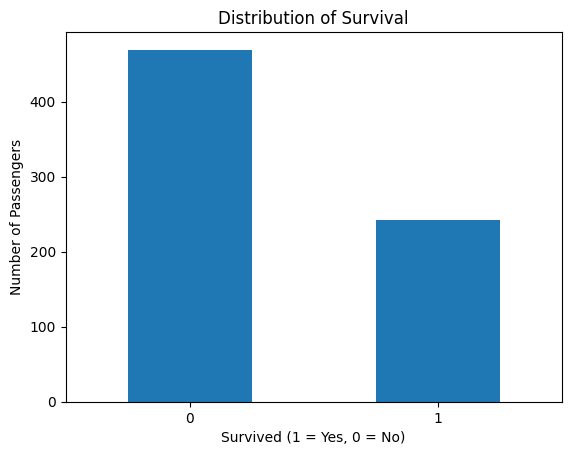

In [20]:
df['Survived'].value_counts().plot(kind='bar')
plt.title('Distribution of Survival')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.show()

# Survival Rate by Gender

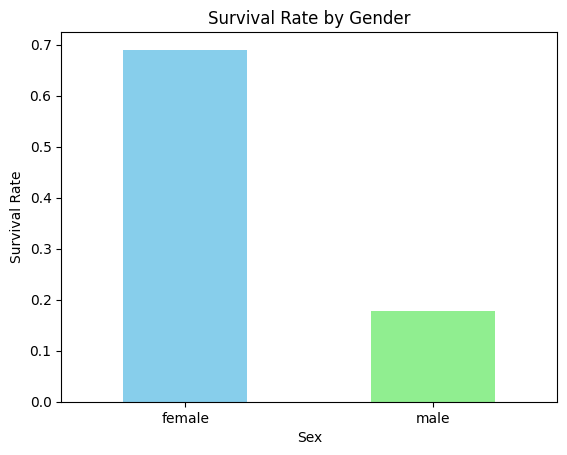

In [21]:
df.groupby('Sex')['Survived'].mean().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.show()

# Age Distribution by Survival

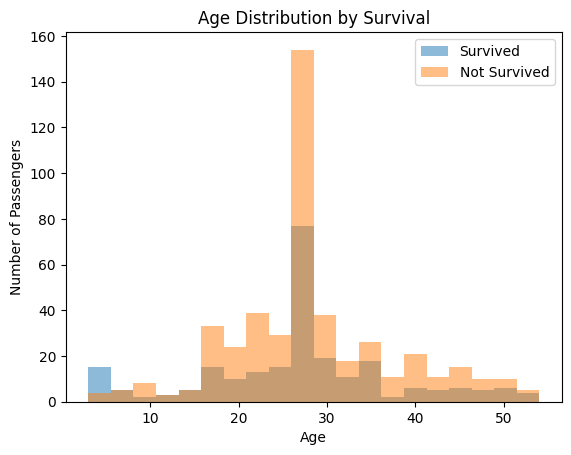

In [22]:
plt.hist(df[df['Survived'] == 1]['Age'], bins=20, alpha=0.5, label='Survived')
plt.hist(df[df['Survived'] == 0]['Age'], bins=20, alpha=0.5, label='Not Survived')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Survival Rate Based on Number of Parents/Children (Parch)

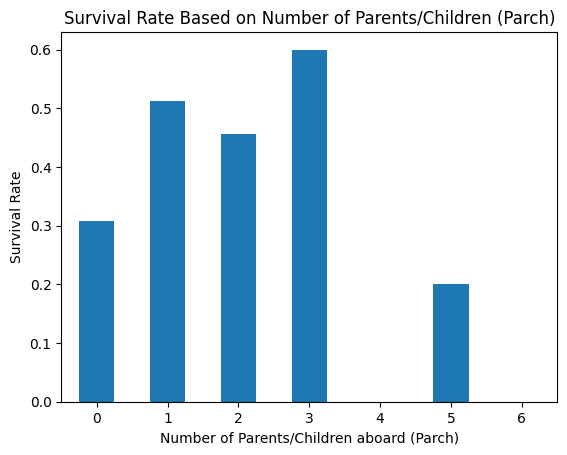

In [19]:
df.groupby('Parch')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate Based on Number of Parents/Children (Parch)')
plt.xlabel('Number of Parents/Children aboard (Parch)')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

Feature Engineering for better model performance

In [35]:
# --- Extract Title from Name (Mr, Mrs, Miss, etc.)
# Ensure 'Name' column exists and is string
df['Name'] = df['Name'].astype(str)
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace rare and variant titles
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Mme'], 'Mrs')

# Replace very rare titles with 'Rare'
title_counts = df['Title'].value_counts()
rare_titles = title_counts[title_counts < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

# --- Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# --- IsAlone flag
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# --- Age bins (ensure bins are strictly increasing)
age_min = df['Age'].min()
age_max = df['Age'].max()
age_bins = [0, 12, 18, 35, 60, age_max + 1]  # last bin upper bound > max value
age_labels = ['Child', 'Teen', 'Adult', 'MidAge', 'Senior']
df['AgeBin'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# --- Fare bins (handle duplicates and edge cases)
# qcut can fail if duplicate edges exist, so add duplicates='drop'
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Mid', 'High', 'VeryHigh'], duplicates='drop')


<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-3292325515.py:4: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


ValueError: bins must increase monotonically.

Encode categorical variables

In [28]:
categorical_cols = ['Sex', 'Embarked', 'Title', 'AgeBin', 'FareBin']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


KeyError: "['AgeBin', 'FareBin'] not in index"

Select Features and Target

In [29]:
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')
y = df['Survived']


 Split Data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Scale Numerical Features

In [31]:
scaler = StandardScaler()
num_cols = ['Age', 'Fare', 'FamilySize']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


Tune and Train KNN

In [32]:
param_grid = {'n_neighbors': range(3, 21)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_


NameError: name 'GridSearchCV' is not defined

Predictions

In [33]:
y_pred = best_knn.predict(X_test)

NameError: name 'best_knn' is not defined

Evaluate

In [34]:
print("\n===============================")
print("🔹 KNN Model with Feature Engineering")
print("===============================")
print("Best K:", grid_knn.best_params_)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



🔹 KNN Model with Feature Engineering


NameError: name 'grid_knn' is not defined